In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_hub as  hub
import tensorflow_datasets as tfds
import  numpy as np

from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

In [0]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [0]:
Classifier = "https://tfhub.dev/google/imagenet/inception_resnet_v2/classification/4"
image_res = 299
feature_extractor = hub.KerasLayer(Classifier , input_shape=(image_res, image_res, 3))
feature_extractor.trainable = False

In [0]:
model = tf.keras.Sequential([feature_extractor,
                             layers.Dense(7),
                             layers.Activation(tf.nn.softmax)
                            ])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              55875273  
_________________________________________________________________
dense (Dense)                (None, 7)                 7014      
_________________________________________________________________
activation (Activation)      (None, 7)                 0         
Total params: 55,882,287
Trainable params: 7,014
Non-trainable params: 55,875,273
_________________________________________________________________


In [0]:
train_image_generator      = ImageDataGenerator(rescale=1./255,
                                                rotation_range=30,
                                                zoom_range=0.2,
                                                horizontal_flip=True,
                                                width_shift_range=0.15,
                                                height_shift_range=0.15
                                               )  
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator       = ImageDataGenerator(rescale=1./255)

In [0]:
IMG_SHAPE = 299

In [0]:
#train_dir = '../data/faces/train/'
#val_dir = '../data/faces/val/'
train_dir = '/content/drive/My Drive/faces/train/'
val_dir = '/content/drive/My Drive/faces/val/'

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [9]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=100,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                           class_mode='sparse')

Found 155 images belonging to 7 classes.


In [10]:
print(train_data_gen.class_indices)

{'Aditya Solanki': 0, 'Ben Afflek': 1, 'Elton John': 2, 'Jerry Seinfeld': 3, 'Madonna': 4, 'Mindy Kaling': 5, 'Unknown': 6}


In [11]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=20,
                                                              directory=val_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                              class_mode='sparse')

Found 35 images belonging to 7 classes.


In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              55875273  
_________________________________________________________________
dense (Dense)                (None, 7)                 7014      
_________________________________________________________________
activation (Activation)      (None, 7)                 0         
Total params: 55,882,287
Trainable params: 7,014
Non-trainable params: 55,875,273
_________________________________________________________________


In [14]:
EPOCHS = 100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(155 / float(100))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(35 / float(20)))
)

Epoch 1/100
2/2 [==============================] - 13s 6s/step - loss: 1.9655 - accuracy: 0.1419 - val_loss: 1.9504 - val_accuracy: 0.1429
Epoch 2/100
2/2 [==============================] - 3s 1s/step - loss: 1.8991 - accuracy: 0.2581 - val_loss: 1.9076 - val_accuracy: 0.2286
Epoch 3/100
2/2 [==============================] - 3s 1s/step - loss: 1.8701 - accuracy: 0.3032 - val_loss: 1.8441 - val_accuracy: 0.3143
Epoch 4/100
2/2 [==============================] - 2s 1s/step - loss: 1.8276 - accuracy: 0.3355 - val_loss: 1.7933 - val_accuracy: 0.3714
Epoch 5/100
2/2 [==============================] - 3s 1s/step - loss: 1.7856 - accuracy: 0.4129 - val_loss: 1.7727 - val_accuracy: 0.3714
Epoch 6/100
2/2 [==============================] - 2s 1s/step - loss: 1.7578 - accuracy: 0.4129 - val_loss: 1.7667 - val_accuracy: 0.4571
Epoch 7/100
2/2 [==============================] - 3s 1s/step - loss: 1.7660 - accuracy: 0.4194 - val_loss: 1.7559 - val_accuracy: 0.4571
Epoch 8/100
2/2 [================

In [0]:
model.save('face-recogition-colab.h5')

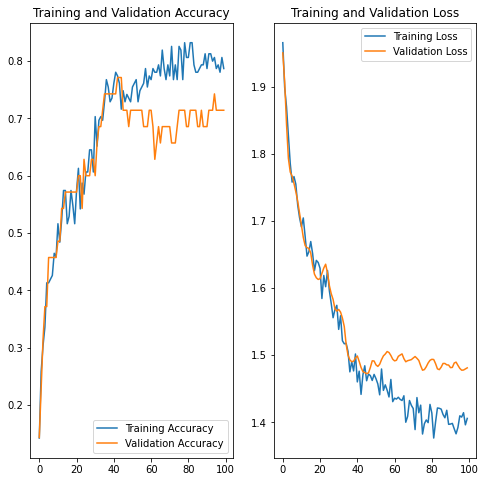

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./learning-colab.png')
plt.show()

In [22]:
#model = load_model('keras.h5')
model = tf.keras.models.load_model('face-recogition-colab.h5',custom_objects={'KerasLayer':hub.KerasLayer})
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              55875273  
_________________________________________________________________
dense (Dense)                (None, 7)                 7014      
_________________________________________________________________
activation (Activation)      (None, 7)                 0         
Total params: 55,882,287
Trainable params: 7,014
Non-trainable params: 55,875,273
_________________________________________________________________
